In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import gym
import gym_stochastic

In [4]:
import gym_stochastic
from gym_stochastic.envs.dist_utils import *

In [5]:
#gym.make('WetChicken1d-v0')
env_happyland=gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=1.0, r_dist_fn=1.0)

In [6]:
import pandas as pd

In [7]:
def eval_gym(env,bins=10,max_steps=100):    
    obs=env.reset()
    done=False
    frame={}
    frames=[]
    steps=0
    while steps<max_steps:
        #print(obs)
        action=env.action_space.sample()
        obs,rew,done,info = env.step(action)
        frame={'obs':obs,'r':rew,'done':done,'info':info,'action':action}
        #print(frame)
        frames += [frame]
        steps+=1

    df = pd.DataFrame(frames)
    df
    means={}
    stds={}
    for i in range(0,env.action_space.n):
        means[i]=df[df.action==i].r.mean()
        stds[i]=df[df.action==i].r.std()
        df[df.action==i].r.hist(alpha=0.4,bins=bins)
    print("means",means)
    print("std",stds)


In [8]:
env_happyland.action_space.n

2

means {0: 1.0, 1: 1.0}
std {0: 0.0, 1: 0.0}


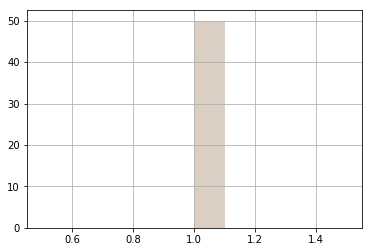

In [9]:
eval_gym(env_happyland)

means {0: 0.13333333333333333, 1: 0.05454545454545454}
std {0: 0.3437758254761643, 1: 0.2291838836507762}


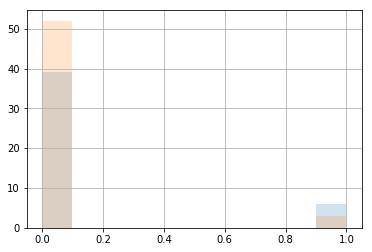

In [10]:
env_rarehappy=gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=0.1, r_dist_fn=1.0)
eval_gym(env_rarehappy)

means {0: 0.07407407407407407, 1: -0.06086956521739133}
std {0: 0.26435052857271474, 1: 0.04934351637951687}


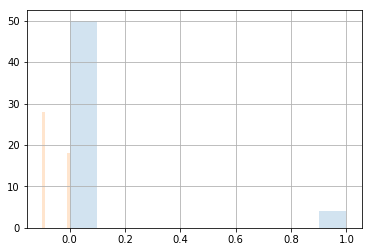

In [11]:
eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=[0.1,0.6], r_dist_fn=[1.0,-0.1]) 
)


means {0: -0.06603561903032097, 1: 0.14758903957545585}
std {0: 0.5292298805382614, 1: 0.9864869167004993}


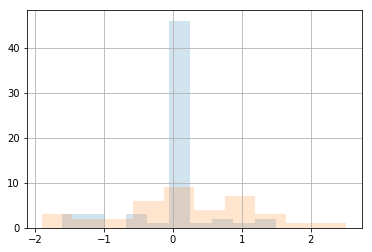

In [12]:
eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=[0.333,1.0], r_dist_fn=reward_sampler__fixed_simplegauss) 
)


means {0: -4.484380060745123, 1: 0.8921448341951634, 2: 1.7563123533276337, 3: -0.07874031111422408}
std {0: 1.7463495729289122, 1: 0.3706036305140783, 2: 0.6561819890163618, 3: 0.09125969502072712}


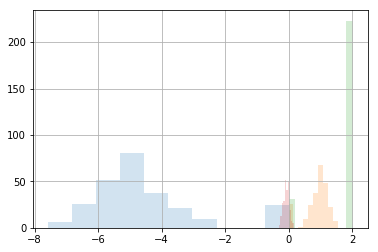

In [13]:
arms_r = get_reward_sampler__fixed_norm_arm( rew_means=[-5.0,1.0,2.0,-0.1],rew_vars=[1.0,0.2,0.01,0.1], )

eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=4, p_dist_fn=0.9, r_dist_fn=arms_r )
    , max_steps=1000)

means {0: -2.0683646439683145, 1: 1.923425618827741}
std {0: 1.0083026342233259, 1: 0.9768691316555088}


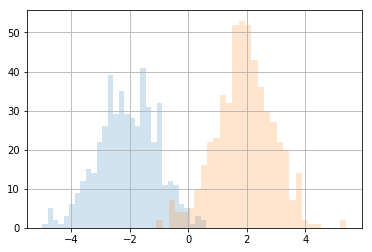

In [14]:
arms_r1 = get_reward_sampler__fixed_norm_arm( rew_means=[-2.0,2.0,], rew_vars=[1.0,1.0], )

eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=1.0, r_dist_fn=arms_r1 )
    , max_steps=1000,bins=30)

means {0: 0.9802829775583233, 1: -9.937637671163564}
std {0: 0.9844585010526691, 1: 2.9476160423330255}


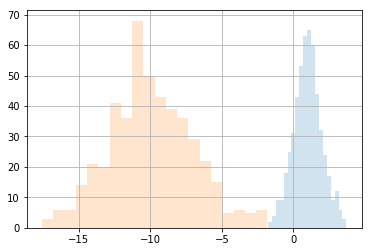

In [15]:
arms_r2 = get_reward_sampler__fixed_norm_arm( rew_means=[1.0,-10.0], rew_vars=[1.0,3.0,], )

eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=1.0, r_dist_fn=arms_r2 )
    , max_steps=1000,bins=20)

means {0: 0.9865572791180297, 1: -9.783529250340216}
std {0: 1.0237831538741273, 1: 3.3049200167641315}


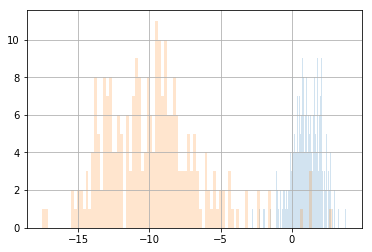

In [16]:
arms_r_sum = get_sampler__composite_sum( sub_samplers= [ arms_r1,arms_r2  ] )
arms_r_comp = get_sampler__composite_select( sub_samplers=[ arms_r1,arms_r2  ], dist=[0.01,0.99] )

eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=1.0, r_dist_fn=arms_r_comp )
    , max_steps=500,bins=100)

means {0: 0.055640739767075904, 1: -1.7715318209194941}
std {0: 2.118966032914663, 1: 4.775985846468212}


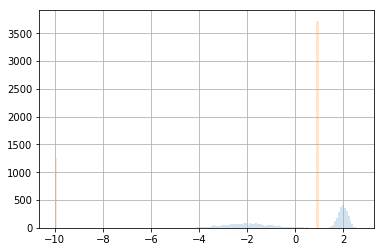

In [17]:
arms_r_comp = get_sampler__composite_perarm( 
    sub_samplers=[
        get_sampler__composite_select([
            get_reward_sampler__fixed_norm_arm(2.0,0.2),
            get_reward_sampler__fixed_norm_arm(-2.0,1.0)]
        ), 
        get_sampler__composite_select([
            1.0, #get_reward_sampler__fixed_norm_arm(1.0,1.0),
            -10.0], dist=[0.3,0.1])
    ], )

eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=1.0, r_dist_fn=arms_r_comp ), 
    max_steps=10000,bins=100
    )


means {0: -7.479768558885811, 1: 3.4587253425604487}
std {0: 12.9818778941957, 1: 8.352742314156979}


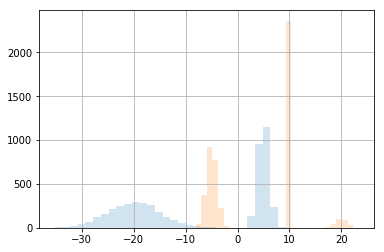

In [18]:
arms_r_comp = get_sampler__composite_perarm( 
    sub_samplers=[
        get_sampler__composite_select([
            get_reward_sampler__fixed_norm_arm(5.0,1.0),
            get_reward_sampler__fixed_norm_arm(-20.0,5.0),]
        ),
        get_sampler__composite_select([
            get_reward_sampler__fixed_norm_arm(20.0,1.0),
            get_reward_sampler__fixed_norm_arm(10.0,0.1),
            get_reward_sampler__fixed_norm_arm(-5.0,1.0),],
            dist=[0.1, 0.9, 0.9]
    )
    ], )

eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=2, p_dist_fn=1.0, r_dist_fn=arms_r_comp ), 
    max_steps=10000,bins=30
    )


means {0: -4.755375798058282}
std {0: 21.24681346708896}


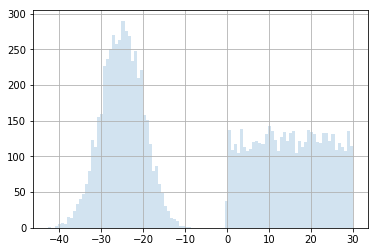

In [19]:

arm_z1 = get_sampler__composite_select([
            get_reward_sampler__fixed_uniform_arm(0.0,30.0),
            get_reward_sampler__fixed_norm_arm(-25.0,5.0),],
            dist=[1.0, 1.0,] )

eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=1, p_dist_fn=1.0, r_dist_fn=arm_z1 ), 
    max_steps=10000,bins=100
    )


means {0: -2.756375812203992}
std {0: 27.361165572323305}


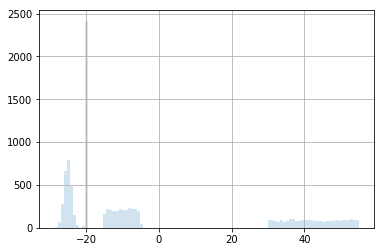

In [20]:
arm_z2 = get_sampler__composite_select([
            get_reward_sampler__fixed_uniform_arm(-15.0,-5.0),
            get_reward_sampler__fixed_uniform_arm(30.0,55.0),

            get_reward_sampler__fixed_norm_arm(-25.0,1.0),
            get_reward_sampler__fixed_norm_arm(-20.0,0.1),
], )

env1 = gym.make('DistributionContextualBanditEnv-v0',arms=1, p_dist_fn=1.0, r_dist_fn=arm_z2 )
eval_gym( env1, max_steps=10000,bins=100 )


means {0: 35.717157026147625}
std {0: 43.394274666547105}


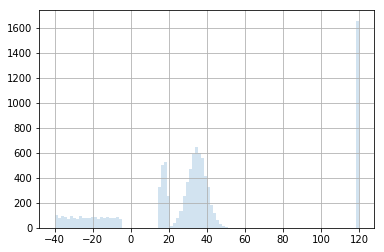

In [21]:
arm_z3 = get_sampler__composite_select([
            get_reward_sampler__fixed_uniform_arm(-40.0,-5.0),
            get_reward_sampler__fixed_uniform_arm(15.0,20.0),

            120.0,

            get_reward_sampler__fixed_norm_arm(35.0,5.0),
            ],
            dist=[1.1, 1.0, 1.0,3.0]
        )


eval_gym( 
    gym.make('DistributionContextualBanditEnv-v0',arms=1, p_dist_fn=1.0, r_dist_fn=arm_z3 ), 
    max_steps=10000,bins=100
    )


means {0: -4.898413973293558, 1: -3.1487248546109825, 2: 35.79888645456881}
std {0: 21.20454938891987, 1: 27.243853035070728, 2: 43.21951773184034}


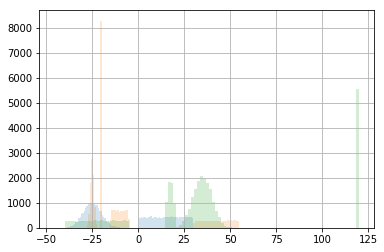

In [22]:
arms_r_comp = get_sampler__composite_perarm( sub_samplers=[ arm_z1, arm_z2, arm_z3 ], )

fancy_bandit = gym.make('DistributionContextualBanditEnv-v0',arms=3, p_dist_fn=1.0, r_dist_fn=arms_r_comp )

eval_gym( fancy_bandit, max_steps=100000,bins=100 )
